<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Image%20Classification/CIFAR_10_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv2D

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
import tensorflow as tf
cifar10=tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

(32, 32, 3)


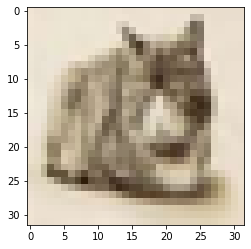

In [ ]:
i=np.random.randint(1,10000)
plt.imshow(x_train[i])
print(x_train[i].shape)

In [ ]:
k=len(np.unique(y_train))
k

10

In [ ]:
#builiding model
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2863 - accuracy: 0.5453 - val_loss: 1.2761 - val_accuracy: 0.5445
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2529 - accuracy: 0.5535 - val_loss: 1.2412 - val_accuracy: 0.5705
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2296 - accuracy: 0.5673 - val_loss: 1.2032 - val_accuracy: 0.5854
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2076 - accuracy: 0.5725 - val_loss: 1.2023 - val_accuracy: 0.6002
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2023 - accuracy: 0.5776 - val_loss: 1.2349 - val_accuracy: 0.5770
Epoch 6/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1797 - accuracy: 0.5860 - val_loss: 1.1951 - val_accuracy: 0.5775
Epoch 7/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1749 - accuracy: 0.5890 - val_loss: 1.2587 -

In [ ]:
type(cifar10)

module

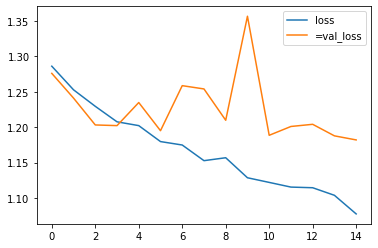

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='=val_loss')
plt.legend()

In [ ]:
y_pred=model.predict(x_test).argmax(axis=1)

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_test=y_test.reshape(-1)

Actual: horse , predicted: cat


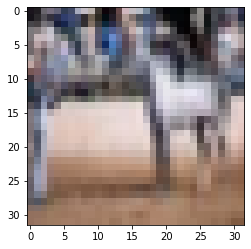

In [ ]:
#missclassified examples 
p=np.where(y_test!=y_pred)[0]
i=np.random.choice(p)
plt.imshow(x_test[i])
print("Actual: %s , predicted: %s" % (labels[int(y_test[i])],labels[int(y_pred[i])]))

In [ ]:
p=np.where(y_test!=y_pred)[0]

In [ ]:
p=np.array(p)
p.shape

(4200,)

In [ ]:
y_pred.shape,y_test.shape


((10000,), (10000,))